In [4]:
import matplotlib.pyplot as plt
import json
import numpy as np
from PIL import Image
import pandas as pd
import rasterio
scale = 10.8557 #px/um


In [5]:
with open("../mean_density_est.json", 'r') as file:
    mde = json.load(file)

values = np.array(mde['v'])
values[values == 'NA'] = np.nan
values = values.astype('float')  # Ensure the matrix is of float type to accommodate np.nan
masked_array = np.ma.array(values, mask=np.isnan(values))

mde["image"] = masked_array

with open("../cell3/preprocess.json", 'r') as file:
    preprocess = json.load(file)


mitochondria_dist = np.array(preprocess["covariates"]["distance"]["mitochondria"])
mitochondria_bin = np.array(preprocess["covariates"]["binary"]["mitochondria"])
nuc_dist = np.array(preprocess["covariates"]["distance"]["nucleus"])
nuc2_dist = np.array(preprocess["covariates"]["distance"]["nucleus2"])
study_area =np.array(preprocess["study area mask"])

original_extend = (0, np.array(mitochondria_dist).shape[1]/scale, 0, np.array(mitochondria_dist).shape[0]/scale)


cell_contour = preprocess["contour"]["cell"]
nucleus_contour = preprocess["contour"]["nucleus"]

points = preprocess["point patterns"]["peroxisomes"]


values = np.array(mde['v'])
values[values == 'NA'] = np.nan
values = values.astype('float')  # Ensure the matrix is of float type to accommodate np.nan
masked_array = np.ma.array(values, mask=np.isnan(values))

mde["image"] = masked_array

with open("../cell1/marginals_full.json", 'r') as file:
    marginals1 = json.load(file)

with open("../cell2/marginals_full.json", 'r') as file:
    marginals2 = json.load(file)

with open("../cell3/marginals.json", 'r') as file:
    marginals3 = json.load(file)

with open("../cell4/marginals_full.json", 'r') as file:
    marginals4 = json.load(file)

with open("../cell5/marginals_full.json", 'r') as file:
    marginals5 = json.load(file)

with open("../cell6/marginals_full.json", 'r') as file:
    marginals6 = json.load(file)
    
marginals = [marginals1,marginals2,marginals3,marginals4,marginals5,marginals6]

with open("../cell6/marginals_lipid.json", 'r') as file:
    marginals_lip6 = json.load(file)

with open("../cell5/marginals_lipid.json", 'r') as file:
    marginals_lip5 = json.load(file)

with open("../cell4/marginals_lipid.json", 'r') as file:
    marginals_lip4 = json.load(file)

with open("../cell3/marginals_lipid.json", 'r') as file:
    marginals_lip3 = json.load(file)

with open("../cell2/marginals_lipid.json", 'r') as file:
    marginals_lip2 = json.load(file)

with open("../cell1/marginals_lipid.json", 'r') as file:
    marginals_lip1 = json.load(file)

marginals_lip = [marginals_lip1,marginals_lip2,marginals_lip3,marginals_lip4,marginals_lip5,marginals_lip6]



meanfullrf = dict()
with rasterio.open("../mean_full_rf.tif") as src:
    # Read the raster data
    image = src.read(1)  # Reads the first band
    masked_array = np.ma.array(image, mask= image  < -10)
    meanfullrf["image"] = masked_array

    bounds = src.bounds
    # Alternatively, you can construct the extent manually
    meanfullrf["extent"] = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]


meanfull = dict()
with rasterio.open("../mean_full.tif") as src:
    # Read the raster data
    image = src.read(1)  # Reads the first band
    masked_array = np.ma.array(image, mask= image  < -10)
    meanfull["image"] = masked_array

    bounds = src.bounds
    # Alternatively, you can construct the extent manually
    meanfull["extent"] = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

meancov = dict()
with rasterio.open("../mean_cov.tif") as src:
    # Read the raster data
    image = src.read(1)  # Reads the first band
    masked_array = np.ma.array(image, mask= image  < -10)
    meancov["image"] = masked_array

    bounds = src.bounds
    # Alternatively, you can construct the extent manually
    meancov["extent"] = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

meanrnd = dict()
with rasterio.open("../mean_rnd.tif") as src:
    # Read the raster data
    image = src.read(1)  # Reads the first band
    masked_array = np.ma.array(image, mask= image  < -10)
    meanrnd["image"] = masked_array

    bounds = src.bounds
    # Alternatively, you can construct the extent manually
    meanrnd["extent"] = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


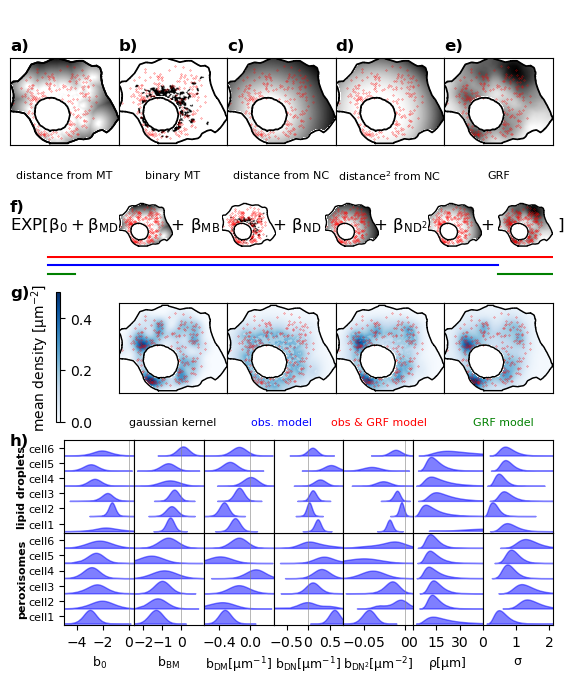

In [6]:
f, axs = plt.subplots(1, 1,figsize=(7, 8))
axs.axis("off")


HTOP = 0.3
HMID = 0.3
HEQ =  0.1
HCB = 0.1
HBOT = 0.3

top = axs.inset_axes([0,HBOT+HMID + HEQ,1,HTOP])
top.axis("off")

eq  = axs.inset_axes([0.0,HBOT+HMID ,1,HEQ])
eq.axis("off")

mid  = axs.inset_axes([0.0,HBOT ,1,HMID])
mid.axis("off")

cbax  = axs.inset_axes([0.0,0.36,0.1,0.15])
cbax.axis("off")

bot  = axs.inset_axes([0.0,0.0,1,HBOT])
bot.axis("off")


## TOP PLOT


DX_TOP = 1/5

top_plots = [top.inset_axes([i*DX_TOP,0,DX_TOP,1])for i in range (5)]


top_plots[0].imshow(np.ma.masked_array(mitochondria_dist, ~(study_area==1)),origin = "lower",extent = original_extend,cmap ="binary" )


top_plots[0].plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1.2)

top_plots[1].imshow(np.ma.masked_array(mitochondria_bin, ~(study_area==1)),origin = "lower",extent = original_extend,cmap ="binary" )


top_plots[2].imshow(np.ma.masked_array(nuc_dist, ~(study_area==1)),origin = "lower",extent = original_extend,cmap ="binary" )


top_plots[3].imshow(np.ma.masked_array(nuc2_dist, ~(study_area==1)),origin = "lower",extent = original_extend,cmap ="binary" )


top_plots[4].imshow(meanfullrf["image"],extent =original_extend,cmap = "binary")


for top_plot in top_plots:

    top_plot.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1.2)
    top_plot.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1.2)
    top_plot.scatter(points["x"],points["y"],s =0.05,color = "red")
    top_plot.set_ylim([-1,original_extend[3]])
    top_plot.set_xticks([])
    top_plot.set_yticks([])
# EQ
eq.text(0,0.5,r"EXP[$\mathrm{\beta_0 + \beta_{MD}}$          + $\mathrm{\beta_{MB}}$          + $\mathrm{\beta_{ND}}$          + $\mathrm{\beta_{ND^2}}$          +            ]",size = 12,va = "center",ha = "left")
start = 0.18
sz = 0.10
deltax  = 0.2

axins = eq.inset_axes([0.2,0,0.1,1])

scale = 10.8557 #px/um
dx = 1/scale
dy = 1/scale

# Image dimensions
ny, nx = mitochondria_dist.shape

# Calculate extent: (left, right, bottom, top)
extent = (0, (nx)*dx, 0, (ny)*dy)

axins.imshow(np.ma.masked_array(mitochondria_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')


axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

axins = eq.inset_axes([0.39,0,0.1,1])

axins.imshow(np.ma.masked_array(mitochondria_bin, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

axins = eq.inset_axes([0.58,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")


axins = eq.inset_axes([0.77,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc2_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

axins = eq.inset_axes([0.9,0,0.1,1])

axins.imshow(meanfullrf["image"],cmap = "binary",extent =  extent)

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

## MID##########

DX_MID = 1/5

cmap = "Blues"

mid_plots = []
for i in range(4):
    mid_plots.append(mid.inset_axes([DX_MID + i*DX_MID,0,DX_MID,1]))


common_vmin = 0
common_vmax = 0.5
mid_plots[0].imshow(mde["image"],extent = mde["extent"],cmap = cmap ,vmin=common_vmin, vmax=common_vmax,origin = "lower")

mid_plots[1].imshow(meancov["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)


mid_plots[1].imshow(meancov["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)


mid_plots[2].imshow(meanfull["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)


cax1 = mid_plots[3].imshow(meanrnd["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)

for mid_plot in mid_plots:

    mid_plot.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
    mid_plot.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
    mid_plot.scatter(points["x"],points["y"],s =0.05,color = "red")
    mid_plot.set_ylim([-1,original_extend[3]+1])
#    mid_plot.axis("off")
    mid_plot.set_xticks([])
    mid_plot.set_yticks([])


cbar = f.colorbar(cax1, ax= cbax,orientation='vertical',label=r'mean density $\mathrm{[\mu m ^{-2}]}$',shrink=1.4,aspect =30)

# Move the colorbar label to the right
cbar.ax.yaxis.set_label_position('left')

#pos = cbar.ax.get_position()
#new_pos = [pos.x0 - 0.10, pos.y0, pos.width, pos.height]
#cbar.ax.set_position(new_pos)


### BOT

LM_BOT = 0.1
DX_BOT = (1-LM_BOT)/7
DY_BOT = 1/2

bot_plots = []

for i in range(2):
    for j in range(7):
        bot_plots.append(bot.inset_axes([LM_BOT+j*DX_BOT,i*DY_BOT,DX_BOT,DY_BOT]))



predictors = ["b0","BM","DM","DN","DN2","rho","sigma"]

for predictor,plot in zip(predictors,bot_plots[7:]):
    H = 1.1*np.max([np.max(np.array(m[predictor])[:,1]) for m in marginals])

    for i,marginal in enumerate(marginals):
        plot.fill_between(np.array(marginal[predictor])[:,0], np.min(np.array(marginal[predictor])[:,1]) + i*H,  i*H + np.array(marginal[predictor])[:,1], color='blue', alpha=0.5)

    plot.plot([0,0],[-0.1*H,6*H],color = "gray",linewidth = 0.4)

    plot.set_ylim([-0.1*H,6*H])

H1 = 1.1*np.max([np.max(np.array(m["b0"])[:,1]) for m in marginals])
bot_plots[7].set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"],size = 8)


#bot_plots[0].set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"])

for predictor,plot in zip(predictors,bot_plots[:7]):
    H = 1.1*np.max([np.max(np.array(m[predictor])[:,1]) for m in marginals_lip])

    for i,marginal in enumerate(marginals_lip):
        plot.fill_between(np.array(marginal[predictor])[:,0], np.min(np.array(marginal[predictor])[:,1]) + i*H,  i*H + np.array(marginal[predictor])[:,1], color='blue', alpha=0.5)

    plot.plot([0,0],[-0.1*H,6*H],color = "gray",linewidth = 0.4)

    plot.set_ylim([-0.1*H,6*H])

H1 = 1.1*np.max([np.max(np.array(m["b0"])[:,1]) for m in marginals_lip])
bot_plots[0].set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"],size = 8)

#plot12.set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"])
for plot in bot_plots[1:7]:
    plot.set_yticks([])
for plot in bot_plots[8:]:
    plot.set_yticks([])

for plot in bot_plots[7:]:
    plot.set_xticks([])


bot_font_sz = 9

bot_plots[0].set_xlabel(r"$\mathrm{b_0}$",size = bot_font_sz)
bot_plots[1].set_xlabel(r"$\mathrm{b_{BM}}$",size = bot_font_sz)
bot_plots[2].set_xlabel(r"$\mathrm{b_{DM}[\mu m^{-1}]}$",size = bot_font_sz)
bot_plots[3].set_xlabel(r"$\mathrm{b_{DN}[\mu m^{-1}]}$",size = bot_font_sz)
bot_plots[4].set_xlabel(r"$\mathrm{b_{DN^2}[\mu m^{-2}]}$",size = bot_font_sz)
bot_plots[5].set_xlabel(r"$\mathrm{\rho[\mu m]}$",size = bot_font_sz)
bot_plots[6].set_xlabel(r"$\mathrm{\sigma}$",size = bot_font_sz)

#plot1.text(-0.24,1.02,"a)",transform = plot1.transAxes, fontweight='bold')
#plot12.text(-0.24,1.02,"b) ",transform = plot12.transAxes, fontweight='bold')

bot_plots[0].text(-0.6,0.5,"peroxisomes",transform = bot_plots[0].transAxes, fontweight='bold',rotation = 90,ha = "center",va = "center",size = 8)
bot_plots[7].text(-0.6,0.5,"lipid droplets",transform = bot_plots[7].transAxes, fontweight='bold',rotation = 90,ha = "center",va = "center",size = 8)

bot_plots[0].set_xlim([-5,0.4])
bot_plots[7].set_xlim([-5,0.4])

bot_plots[1].set_xlim([-2.5,1.2])
bot_plots[8].set_xlim([-2.4,1.2])

bot_plots[2].set_xlim([-0.6,0.3])
bot_plots[9].set_xlim([-0.6,0.3])

bot_plots[3].set_xlim([-0.8,0.8])
bot_plots[10].set_xlim([-0.8,0.8])

bot_plots[4].set_xlim([-0.075,0.01])
bot_plots[11].set_xlim([-0.075,0.01])

bot_plots[6].set_xlim([0,2.1])
bot_plots[13].set_xlim([0,2.1])


bot_plots[5].set_xlim([0,45])
bot_plots[12].set_xlim([0,45])


bot_plots[0].set_xticks([-4,-2,0])
bot_plots[1].set_xticks([-2,-1,0])
bot_plots[2].set_xticks([-0.4,0])
bot_plots[3].set_xticks([-0.5,0,0.5],labels =[r"$-0.5$",r"$0$",r"0.5"])
bot_plots[4].set_xticks(ticks = [-0.05,0],labels =[r"$-0.05$",r"$0$"])
bot_plots[5].set_xticks([0,15,30])
bot_plots[6].set_xticks([0,1,2])

mid.axhline(y=0.99, xmin=0.07, xmax=1,color='r', linestyle='-')  # Horizontal line at y=0.5
mid.axhline(y=0.95, xmin=0.07, xmax=0.9,color='b', linestyle='-')  # Horizontal line at y=0.5
mid.axhline(y=0.90, xmin=0.07, xmax=0.12,color='g', linestyle='-')  # Horizontal line at y=0.5
mid.axhline(y=0.90, xmin=0.9, xmax=1,color='g', linestyle='-')  # Horizontal line at y=0.5



top.text(-0.00,0.8,"a)",size = 12,va = "center",ha = "left", fontweight='bold')

top.text(0.10,0.1,"distance from MT",size = 8,va = "center",ha = "center")
top.text(0.30,0.1,"binary MT",size = 8,va = "center",ha = "center")
top.text(0.50,0.1,"distance from NC",size = 8,va = "center",ha = "center")
top.text(0.70,0.1,r"distance$^2$ from NC",size = 8,va = "center",ha = "center")
top.text(0.90,0.1,r"GRF",size = 8,va = "center",ha = "center")


top.text( 0.20,0.8,"b)",size = 12,va = "center",ha = "left", fontweight='bold')
top.text( 0.40,0.8,"c)",size = 12,va = "center",ha = "left", fontweight='bold')
top.text( 0.60,0.8,"d)",size = 12,va = "center",ha = "left", fontweight='bold')
top.text( 0.80,0.8,"e)",size = 12,va = "center",ha = "left", fontweight='bold')

eq.text(-0.0,0.8,"f)",size = 12,va = "center",ha = "left", fontweight='bold')
mid.text(-0.0,0.8,"g)",size = 12,va = "center",ha = "left", fontweight='bold')
mid.text(0.3,0.1,"gaussian kernel",size = 8,va = "center",ha = "center")
mid.text(0.50,0.1,"obs. model",size = 8,va = "center",ha = "center",color = "b")
mid.text(0.68,0.1,"obs & GRF model",size = 8,va = "center",ha = "center",color = "red")
mid.text(0.91,0.1,"GRF model",size = 8,va = "center",ha = "center",color = "g")


bot.text(-0.0,1.0,"h)",size = 12,va = "center",ha = "left", fontweight='bold')
plt.savefig("../plots/results_single_multi.pdf",dpi = 500)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


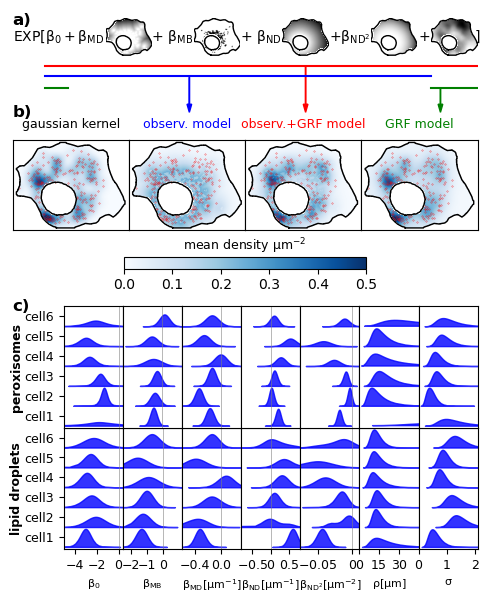

In [6]:
f, axs = plt.subplots(1, 1,figsize=(6, 7))
axs.axis("off")
scale = 10.8557 #px/um


HMID = 0.45
HEQ =  0.1
HCB = 0.15
HBOT = 0.45


eq  = axs.inset_axes([0.0,HBOT+HMID ,1,HEQ])
eq.axis("off")

mid  = axs.inset_axes([0.0,HBOT ,1,HMID])
mid.axis("off")

cbax  = axs.inset_axes([0.0,HBOT+0.07,1.0,HCB])
cbax.axis("off")

bot  = axs.inset_axes([0.0,0.0,1,HBOT])
bot.axis("off")


## TOP PLOT




eq.text(0,0.5,r"EXP[$\mathrm{\beta_0 + \beta_{MD}}$           + $\mathrm{\beta_{MB}}$           + $\mathrm{\beta_{ND}}$           +$\mathrm{\beta_{ND^2}}$           +          ]",size = 10,va = "center",ha = "left")
start = 0.18
sz = 0.10
deltax  = 0.2

axins = eq.inset_axes([0.2,0,0.1,1])

scale = 10.8557 #px/um
dx = 1/scale
dy = 1/scale

# Image dimensions
ny, nx = mitochondria_dist.shape

# Calculate extent: (left, right, bottom, top)
extent = (0, (nx)*dx, 0, (ny)*dy)

axins.imshow(np.ma.masked_array(mitochondria_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')


axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

axins = eq.inset_axes([0.39,0,0.1,1])

axins.imshow(np.ma.masked_array(mitochondria_bin, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

axins = eq.inset_axes([0.58,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")


axins = eq.inset_axes([0.77,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc2_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

axins = eq.inset_axes([0.9,0,0.1,1])

axins.imshow(meanfullrf["image"],cmap = "binary",extent =  extent)

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

## MID##########

DX_MID = 1/4

cmap = "Blues"

mid_plots = []
for i in range(4):
    mid_plots.append(mid.inset_axes([i*DX_MID,0,DX_MID,1]))


common_vmin = 0
common_vmax = 0.5
mid_plots[0].imshow(mde["image"],extent = mde["extent"],cmap = cmap ,vmin=common_vmin, vmax=common_vmax,origin = "lower")

mid_plots[1].imshow(meancov["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)


mid_plots[1].imshow(meancov["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)


mid_plots[2].imshow(meanfull["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)


cax1 = mid_plots[3].imshow(meanrnd["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)

for mid_plot in mid_plots:

    mid_plot.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
    mid_plot.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
    mid_plot.scatter(points["x"],points["y"],s =0.05,color = "red")
    mid_plot.set_ylim([-1,original_extend[3]+1])
    mid_plot.set_xlim([-2,original_extend[1]+2])

#    mid_plot.axis("off")
    mid_plot.set_xticks([])
    mid_plot.set_yticks([])


cbar = f.colorbar(cax1, ax= cbax,orientation='horizontal')
cbar.set_label(r'mean density $\mathrm{\mu m^{-2}}$', fontsize=9, labelpad=-40, loc='center')

#pos = cbar.ax.get_position()
#new_pos = [pos.x0 - 0.10, pos.y0, pos.width, pos.height]
#cbar.ax.set_position(new_pos)


### BOT

LM_BOT = 0.11
DX_BOT = (1-LM_BOT)/7
DY_BOT = 1/2

bot_plots = []

for i in range(2):
    for j in range(7):
        bot_plots.append(bot.inset_axes([LM_BOT+j*DX_BOT,i*DY_BOT,DX_BOT,DY_BOT]))



predictors = ["b0","BM","DM","DN","DN2","rho","sigma"]

for predictor,plot in zip(predictors,bot_plots[7:]):
    H = 1.1*np.max([np.max(np.array(m[predictor])[:,1]) for m in marginals])

    for i,marginal in enumerate(marginals):
        plot.fill_between(np.array(marginal[predictor])[:,0], np.min(np.array(marginal[predictor])[:,1]) + i*H,  i*H + np.array(marginal[predictor])[:,1], color='blue', alpha=0.8)

    plot.plot([0,0],[-0.1*H,6*H],color = "gray",linewidth = 0.4)

    plot.set_ylim([-0.1*H,6*H])

H1 = 1.1*np.max([np.max(np.array(m["b0"])[:,1]) for m in marginals])
bot_plots[7].set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"],size = 8)


#bot_plots[0].set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"])

for predictor,plot in zip(predictors,bot_plots[:7]):
    H = 1.1*np.max([np.max(np.array(m[predictor])[:,1]) for m in marginals_lip])

    for i,marginal in enumerate(marginals_lip):
        plot.fill_between(np.array(marginal[predictor])[:,0], np.min(np.array(marginal[predictor])[:,1]) + i*H,  i*H + np.array(marginal[predictor])[:,1], color='blue', alpha=0.8)

    plot.plot([0,0],[-0.1*H,6*H],color = "gray",linewidth = 0.4)

    plot.set_ylim([-0.1*H,6*H])

H1 = 1.1*np.max([np.max(np.array(m["b0"])[:,1]) for m in marginals_lip])
bot_plots[0].set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"],size = 8)

#plot12.set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"])
for plot in bot_plots[1:7]:
    plot.set_yticks([])
for plot in bot_plots[8:]:
    plot.set_yticks([])

for plot in bot_plots[7:]:
    plot.set_xticks([])


bot_font_sz = 8

bot_plots[0].set_xlabel(r"$\mathrm{\beta_0}$",size = bot_font_sz,rotation =0)
bot_plots[1].set_xlabel(r"$\mathrm{\beta_{MB}}$",size = bot_font_sz,rotation =0)
bot_plots[2].set_xlabel(r"$\mathrm{\beta_{MD}[\mu m^{-1}]}$",size = bot_font_sz,rotation =0)
bot_plots[3].set_xlabel(r"$\mathrm{\beta_{ND}[\mu m^{-1}]}$",size = bot_font_sz,rotation =0)
bot_plots[4].set_xlabel(r"$\mathrm{\beta_{ND^2}[\mu m^{-2}]}$",size = bot_font_sz,rotation =0)
bot_plots[5].set_xlabel(r"$\mathrm{\rho[\mu m]}$",size = bot_font_sz,rotation =0)
bot_plots[6].set_xlabel(r"$\mathrm{\sigma}$",size = bot_font_sz,rotation =0)

#plot1.text(-0.24,1.02,"a)",transform = plot1.transAxes, fontweight='bold')
#plot12.text(-0.24,1.02,"b) ",transform = plot12.transAxes, fontweight='bold')

bot_plots[0].text(-0.8,0.5,"lipid droplets",transform = bot_plots[0].transAxes, fontweight='bold',rotation = 90,ha = "center",va = "center",size = 9)
bot_plots[7].text(-0.8,0.5,"peroxisomes",transform = bot_plots[7].transAxes, fontweight='bold',rotation = 90,ha = "center",va = "center",size = 9)

bot_plots[0].set_xlim([-5,0.4])
bot_plots[7].set_xlim([-5,0.4])

bot_plots[1].set_xlim([-2.5,1.2])
bot_plots[8].set_xlim([-2.4,1.2])

bot_plots[2].set_xlim([-0.6,0.3])
bot_plots[9].set_xlim([-0.6,0.3])

bot_plots[3].set_xlim([-0.8,0.8])
bot_plots[10].set_xlim([-0.8,0.8])

bot_plots[4].set_xlim([-0.075,0.01])
bot_plots[11].set_xlim([-0.075,0.01])

bot_plots[6].set_xlim([0,2.1])
bot_plots[13].set_xlim([0,2.1])


bot_plots[5].set_xlim([0,45])
bot_plots[12].set_xlim([0,45])


bot_plots[0].set_xticks([-4,-2,0])
bot_plots[1].set_xticks([-2,-1,0])
bot_plots[2].set_xticks([-0.4,0])
bot_plots[3].set_xticks([-0.5,0,0.5],labels =[r"$-0.5$",r"$0$",r"0.5"])
bot_plots[4].set_xticks(ticks = [-0.05,0],labels =[r"$-0.05$",r"$0$"])
bot_plots[5].set_xticks([0,15,30])
bot_plots[6].set_xticks([0,1,2])

mid.axhline(y=0.99, xmin=0.07, xmax=1,color='r', linestyle='-')  # Horizontal line at y=0.5
mid.axhline(y=0.95, xmin=0.07, xmax=0.9,color='b', linestyle='-')  # Horizontal line at y=0.5
mid.axhline(y=0.90, xmin=0.07, xmax=0.12,color='g', linestyle='-')  # Horizontal line at y=0.5
mid.axhline(y=0.90, xmin=0.9, xmax=1,color='g', linestyle='-')  # Horizontal line at y=0.5


for bot_plot in bot_plots:
    bot_plot.tick_params(axis='x', labelsize=9)
    bot_plot.tick_params(axis='y', labelsize=9)


eq.text(-0.0,0.8,"a)",size = 12,va = "center",ha = "left", fontweight='bold')
mid.text(-0.0,0.8,"b)",size = 12,va = "center",ha = "left", fontweight='bold')
mid.text(DX_MID/2,0.75,"gaussian kernel",size = 9,va = "center",ha = "center")
mid.text(DX_MID/2 + DX_MID,0.75,"observ. model",size = 9,va = "center",ha = "center",color = "b")
mid.text(DX_MID/2 + 2*DX_MID,0.75,"observ.+GRF model",size = 9,va = "center",ha = "center",color = "red")
mid.text(DX_MID/2 + 3*DX_MID,0.75,"GRF model",size = 9,va = "center",ha = "center",color = "g")


bot.text(-0.0,1.0,"c)",size = 12,va = "center",ha = "left", fontweight='bold')

ar_end = 0.825

axs.arrow(0.63, 0.895, 0,ar_end - 0.895 ,transform = axs.transAxes,color ="red",head_width= 0.01)
axs.arrow(0.92, 0.855, 0,ar_end-0.855  ,transform = axs.transAxes,color ="green",head_width= 0.01)
axs.arrow(0.38, 0.875, 0,ar_end-0.875  ,transform = axs.transAxes,color ="blue",head_width= 0.01)


plt.savefig("../plots/results_single_multi_short.pdf",dpi = 500)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


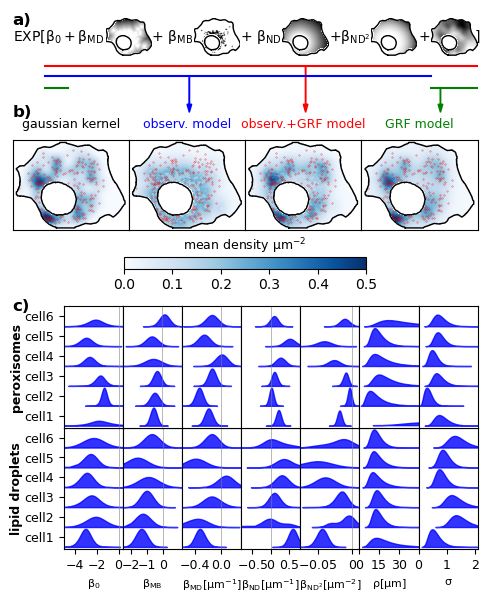

In [150]:
f, axs = plt.subplots(1, 1,figsize=(6, 7))
axs.axis("off")
scale = 10.8557 #px/um


HMID = 0.45
HEQ =  0.1
HCB = 0.15
HBOT = 0.45


eq  = axs.inset_axes([0.0,HBOT+HMID ,1,HEQ])
eq.axis("off")

mid  = axs.inset_axes([0.0,HBOT ,1,HMID])
mid.axis("off")

cbax  = axs.inset_axes([0.0,HBOT+0.07,1.0,HCB])
cbax.axis("off")

bot  = axs.inset_axes([0.0,0.0,1,HBOT])
bot.axis("off")


## TOP PLOT




eq.text(0,0.5,r"EXP[$\mathrm{\beta_0 + \beta_{MD}}$           + $\mathrm{\beta_{MB}}$           + $\mathrm{\beta_{ND}}$           +$\mathrm{\beta_{ND^2}}$           +          ]",size = 10,va = "center",ha = "left")
start = 0.18
sz = 0.10
deltax  = 0.2

axins = eq.inset_axes([0.2,0,0.1,1])

scale = 10.8557 #px/um
dx = 1/scale
dy = 1/scale

# Image dimensions
ny, nx = mitochondria_dist.shape

# Calculate extent: (left, right, bottom, top)
extent = (0, (nx)*dx, 0, (ny)*dy)

axins.imshow(np.ma.masked_array(mitochondria_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')


axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

axins = eq.inset_axes([0.39,0,0.1,1])

axins.imshow(np.ma.masked_array(mitochondria_bin, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

axins = eq.inset_axes([0.58,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")


axins = eq.inset_axes([0.77,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc2_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

axins = eq.inset_axes([0.9,0,0.1,1])

axins.imshow(meanfullrf["image"],cmap = "binary",extent =  extent)

axins.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
axins.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
#axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.set_ylim([-1,original_extend[3]+1])
axins.axis("off")

## MID##########

DX_MID = 1/4

cmap = "Blues"

mid_plots = []
for i in range(4):
    mid_plots.append(mid.inset_axes([i*DX_MID,0,DX_MID,1]))


common_vmin = 0
common_vmax = 0.5
mid_plots[0].imshow(mde["image"],extent = mde["extent"],cmap = cmap ,vmin=common_vmin, vmax=common_vmax,origin = "lower")

mid_plots[1].imshow(meancov["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)


mid_plots[1].imshow(meancov["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)


mid_plots[2].imshow(meanfull["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)


cax1 = mid_plots[3].imshow(meanrnd["image"],extent =original_extend,cmap = cmap,vmin=common_vmin, vmax=common_vmax)

for mid_plot in mid_plots:

    mid_plot.plot(cell_contour["x"],cell_contour["y"],color ="black",linewidth = 1)
    mid_plot.plot(nucleus_contour["x"],nucleus_contour["y"],color ="black",linewidth = 1)
    mid_plot.scatter(points["x"],points["y"],s =0.05,color = "red")
    mid_plot.set_ylim([-1,original_extend[3]+1])
    mid_plot.set_xlim([-2,original_extend[1]+2])

#    mid_plot.axis("off")
    mid_plot.set_xticks([])
    mid_plot.set_yticks([])


cbar = f.colorbar(cax1, ax= cbax,orientation='horizontal')
cbar.set_label(r'mean density $\mathrm{\mu m^{-2}}$', fontsize=9, labelpad=-40, loc='center')

#pos = cbar.ax.get_position()
#new_pos = [pos.x0 - 0.10, pos.y0, pos.width, pos.height]
#cbar.ax.set_position(new_pos)


### BOT

LM_BOT = 0.11
DX_BOT = (1-LM_BOT)/7
DY_BOT = 1/2

bot_plots = []

for i in range(2):
    for j in range(7):
        bot_plots.append(bot.inset_axes([LM_BOT+j*DX_BOT,i*DY_BOT,DX_BOT,DY_BOT]))



predictors = ["b0","BM","DM","DN","DN2","rho","sigma"]

for predictor,plot in zip(predictors,bot_plots[7:]):
    H = 1.1*np.max([np.max(np.array(m[predictor])[:,1]) for m in marginals])

    for i,marginal in enumerate(marginals):
        plot.fill_between(np.array(marginal[predictor])[:,0], np.min(np.array(marginal[predictor])[:,1]) + i*H,  i*H + np.array(marginal[predictor])[:,1], color='blue', alpha=0.8)

    plot.plot([0,0],[-0.1*H,6*H],color = "gray",linewidth = 0.4)

    plot.set_ylim([-0.1*H,6*H])

H1 = 1.1*np.max([np.max(np.array(m["b0"])[:,1]) for m in marginals])
bot_plots[7].set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"],size = 8)


#bot_plots[0].set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"])

for predictor,plot in zip(predictors,bot_plots[:7]):
    H = 1.1*np.max([np.max(np.array(m[predictor])[:,1]) for m in marginals_lip])

    for i,marginal in enumerate(marginals_lip):
        plot.fill_between(np.array(marginal[predictor])[:,0], np.min(np.array(marginal[predictor])[:,1]) + i*H,  i*H + np.array(marginal[predictor])[:,1], color='blue', alpha=0.8)

    plot.plot([0,0],[-0.1*H,6*H],color = "gray",linewidth = 0.4)

    plot.set_ylim([-0.1*H,6*H])

H1 = 1.1*np.max([np.max(np.array(m["b0"])[:,1]) for m in marginals_lip])
bot_plots[0].set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"],size = 8)

#plot12.set_yticks(ticks = [H1/2,H1+H1/2,2*H1+H1/2,3*H1+H1/2,4*H1+H1/2,5*H1+H1/2] ,labels = ["cell1","cell2","cell3","cell4","cell5","cell6"])
for plot in bot_plots[1:7]:
    plot.set_yticks([])
for plot in bot_plots[8:]:
    plot.set_yticks([])

for plot in bot_plots[7:]:
    plot.set_xticks([])


bot_font_sz = 8

bot_plots[0].set_xlabel(r"$\mathrm{\beta_0}$",size = bot_font_sz,rotation =0)
bot_plots[1].set_xlabel(r"$\mathrm{\beta_{MB}}$",size = bot_font_sz,rotation =0)
bot_plots[2].set_xlabel(r"$\mathrm{\beta_{MD}[\mu m^{-1}]}$",size = bot_font_sz,rotation =0)
bot_plots[3].set_xlabel(r"$\mathrm{\beta_{ND}[\mu m^{-1}]}$",size = bot_font_sz,rotation =0)
bot_plots[4].set_xlabel(r"$\mathrm{\beta_{ND^2}[\mu m^{-2}]}$",size = bot_font_sz,rotation =0)
bot_plots[5].set_xlabel(r"$\mathrm{\rho[\mu m]}$",size = bot_font_sz,rotation =0)
bot_plots[6].set_xlabel(r"$\mathrm{\sigma}$",size = bot_font_sz,rotation =0)

#plot1.text(-0.24,1.02,"a)",transform = plot1.transAxes, fontweight='bold')
#plot12.text(-0.24,1.02,"b) ",transform = plot12.transAxes, fontweight='bold')

bot_plots[0].text(-0.8,0.5,"lipid droplets",transform = bot_plots[0].transAxes, fontweight='bold',rotation = 90,ha = "center",va = "center",size = 9)
bot_plots[7].text(-0.8,0.5,"peroxisomes",transform = bot_plots[7].transAxes, fontweight='bold',rotation = 90,ha = "center",va = "center",size = 9)

bot_plots[0].set_xlim([-5,0.4])
bot_plots[7].set_xlim([-5,0.4])

bot_plots[1].set_xlim([-2.5,1.2])
bot_plots[8].set_xlim([-2.4,1.2])

bot_plots[2].set_xlim([-0.6,0.3])
bot_plots[9].set_xlim([-0.6,0.3])

bot_plots[3].set_xlim([-0.8,0.8])
bot_plots[10].set_xlim([-0.8,0.8])

bot_plots[4].set_xlim([-0.075,0.01])
bot_plots[11].set_xlim([-0.075,0.01])

bot_plots[6].set_xlim([0,2.1])
bot_plots[13].set_xlim([0,2.1])


bot_plots[5].set_xlim([0,45])
bot_plots[12].set_xlim([0,45])


bot_plots[0].set_xticks([-4,-2,0])
bot_plots[1].set_xticks([-2,-1,0])
bot_plots[2].set_xticks([-0.4,0])
bot_plots[3].set_xticks([-0.5,0,0.5],labels =[r"$-0.5$",r"$0$",r"0.5"])
bot_plots[4].set_xticks(ticks = [-0.05,0],labels =[r"$-0.05$",r"$0$"])
bot_plots[5].set_xticks([0,15,30])
bot_plots[6].set_xticks([0,1,2])

mid.axhline(y=0.99, xmin=0.07, xmax=1,color='r', linestyle='-')  # Horizontal line at y=0.5
mid.axhline(y=0.95, xmin=0.07, xmax=0.9,color='b', linestyle='-')  # Horizontal line at y=0.5
mid.axhline(y=0.90, xmin=0.07, xmax=0.12,color='g', linestyle='-')  # Horizontal line at y=0.5
mid.axhline(y=0.90, xmin=0.9, xmax=1,color='g', linestyle='-')  # Horizontal line at y=0.5


for bot_plot in bot_plots:
    bot_plot.tick_params(axis='x', labelsize=9)
    bot_plot.tick_params(axis='y', labelsize=9)


eq.text(-0.0,0.8,"a)",size = 12,va = "center",ha = "left", fontweight='bold')
mid.text(-0.0,0.8,"b)",size = 12,va = "center",ha = "left", fontweight='bold')
mid.text(DX_MID/2,0.75,"gaussian kernel",size = 9,va = "center",ha = "center")
mid.text(DX_MID/2 + DX_MID,0.75,"observ. model",size = 9,va = "center",ha = "center",color = "b")
mid.text(DX_MID/2 + 2*DX_MID,0.75,"observ.+GRF model",size = 9,va = "center",ha = "center",color = "red")
mid.text(DX_MID/2 + 3*DX_MID,0.75,"GRF model",size = 9,va = "center",ha = "center",color = "g")


bot.text(-0.0,1.0,"c)",size = 12,va = "center",ha = "left", fontweight='bold')

ar_end = 0.825

axs.arrow(0.63, 0.895, 0,ar_end - 0.895 ,transform = axs.transAxes,color ="red",head_width= 0.01)
axs.arrow(0.92, 0.855, 0,ar_end-0.855  ,transform = axs.transAxes,color ="green",head_width= 0.01)
axs.arrow(0.38, 0.875, 0,ar_end-0.875  ,transform = axs.transAxes,color ="blue",head_width= 0.01)


plt.savefig("../plots/results_single_multi_short.pdf",dpi = 500)

In [182]:
original_extend

(0, 58.12614571146955, 0, 45.7824000294776)

In [7]:
print(np.exp(2*1.3))

13.463738035001692
